# **Taller No. 3: Segmentación por agrupamiento (*clustering*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
1. [**Introducción**](#id1)
2. [**Método**](#id2)
3. [**Código**](#id3)
4. [**Resultados**](#id4)
5. [**Conclusión y discusión**](#id5)


## **1. Introducción**<a name="id1"></a>
En el presente trabajo se seleccionó un conjunto de imágenes de diferentes características, tales como dimensiones, paletas de colores y composiciones. Cada una de ellas tenía un determinado objeto que queríamos resaltar o segmentar como se describe a continuación:

- [Pez payaso en el agua](#id41): El objetivo era que se  resaltara la figura del pez, sin perder las rayas que lo caracterizan, y separandolo del fondo.
- [Aves volando en el atardecer](#id42): El objetivo de esta segmentación era resaltar la silueta de las aves que se muestran en la imagen.
- [Conejo](#id43): Al aplicar una segmentación sobre esta imagen se esperaba obtener al conejo.
- [Elefantes](#id44): El objetivo era resaltar la figura de los elefantes, separandolos del fondo.
- [Auroras boreales](#id45): El objetivo de segmentación es la zona del cielo iluminada por las auroras boreales

## **2. Método**<a name="id2"></a>

Para el desarrollo del presente análisis de kmeans, hicimos una implementación de dicho algoritmo, de la cual explicamos los aspectos más relevantes a continuación:

Nuestro método kmeans, tiene una serie de parámetros necesarios para realizar su ejecución:
1. nGrupos: representa la cantidad de grupos o clusters que se desean realizar para la segmentación.
2. imagenCargada: es la imagen de la cual se hará la segmentación
3. limite: es el número máximo de iteraciones permitidas
4. umbral: es un valor que nos permite establecer cuando dos centroides son "virtualmente iguales"
5. aleatorio: es un valor booleano, que nos indica si se desea hacer una inicialización de centroides aleatoria o no.
6. centroides: es un arreglo con los centroides, por si se desea inicializarlos manualmente (aleatorio = False)


- **Selección e inicialización de los clusters y sus centroides:**

- **Medida de distancia entre un pixel y los centroides de los clusters:**
- **Criterio de movimiento de los clusters:**
- **Criterio de convergencia:**

## **3. Código**<a name="id3"></a>

## **4. Resultados**<a name="id4"></a>
Tras aplicar el algoritmo implementado y descrito en la sección anterior, obtuvimos los siguientes resultados para cada imagen seleccionada:

### [Pez payaso en el agua](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg): <a name="id41"></a>

En este caso, dado el objetivo de segmentación, usamos un k=3, de modo que se generaran 3 grupos en la imagen segmentada. 

Hicimos dos experimentaciones, para comparar los resultados de inicializar los centroides de manera estratégica y de manera aleatoria.

Para la primera, inicializamos los centroides con los colores de cada grupo que queríamos segmentar. Para ellos, usando una herramienta de edición de imágenes,  escogimos un color de cada región que queríamos resaltar (uno del color naranja del pez, otro de las franjas blancas y el último con un tono verde oscuro del fondo). Por otro lado, el criterio para mover los clusters fue asignar cada pixel al grupo de su color más cercano, usando la función explicada en detalle en la sección Método. De este modo, se agruparon todos los píxeles en los grupos de cada color de nuestro interés. Finalmente, para el criterio de convergencia, usamos un máximo de 25 iteraciones y un umbral de 15, de modo que al comparar las dos últimas iteraciones si los centroides se mueven por debajo de la distancia umbral seleccionada, se establece que hay convergencia y se detiene el algoritmo, pues de esta manera sabemos que los centroides de dichas iteraciones son “virtualmente iguales”.

En particular, el umbral se determinó de manera experimental, hicimos 4 pruebas con diferentes umbrales y la misma inicialización de los centroides. Como se muestra a continuación:


![ ](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/Comparacion%20Pez.PNG)

De lo anterior, seleccionamos como mejor resultado el correspondiente a la selección del umbral 15, puesto que segmentaba la región que queríamos (pez con sus franjas) y eliminaba, más que umbral 1 y 15, la información de lo que parece ser una “soga” en el fondo de la imágen. Adicionalmente, notamos que se realizó un menor número de iteraciones cuando se aumentó el umbral, esto se debe a que se cumple más rápidamente el criterio de convergencia ya explicado. El proceso para obtener la imagen resultante se muestra a continuación.

In [2]:
import utils.segmentation as seg
import utils.visualization as vis
import matplotlib.pyplot as plt
from skimage import color

In [8]:
url1 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/d.jpg"
img1 = seg.download_image(url1)

The shape of the image is: (326, 540, 3)


In [9]:
resA1 = seg.kmeans(3, img1, 25, 30, False, [(255, 161, 8), (247, 251, 252), (42, 65, 59)])

C  [(255, 161, 8), (247, 251, 252), (42, 65, 59)]
Iteracion actual -> 1
Iteracion actual -> 2


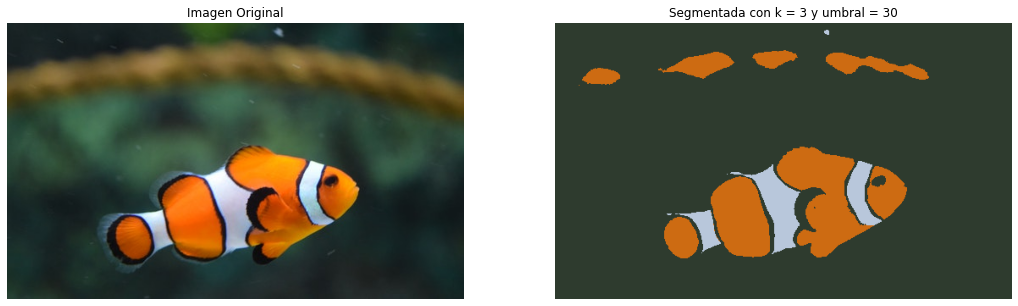

In [10]:
vis.visualize_subplot([img1, resA1],
                      ["Imagen Original", "Segmentada con k = 3 y umbral = 30"], (1, 2), figsize=(18, 6))

Adicionalemente, para comparar los resultados de esta instanciación de kmeans, con los centroides inicializados manualmente y evaluar su desempeño de manera cuantitativa. Graficamos el histograma de la imagen resultado, y obtuvimos que hay 3 picos, correspondientes a cada valor R,G,B del centroide final. En particular, hay un pico mucho más alto que los otros dos, el cual tiene mayor frcuencia de aparición y corresponde al fondo de la imagen resultado, mientras los pequeños corresponden a nuestro objetivo de segmentación. Por lo tanto, podemos decir, que la segmentación fue bastante buena, bues se logró separar la región objetivo del fondo

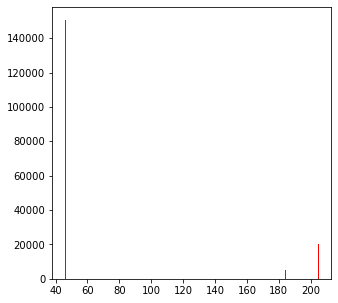

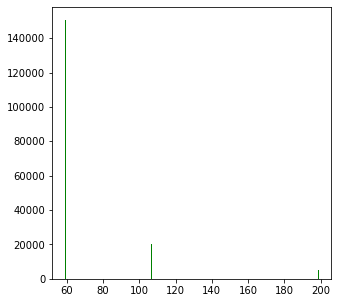

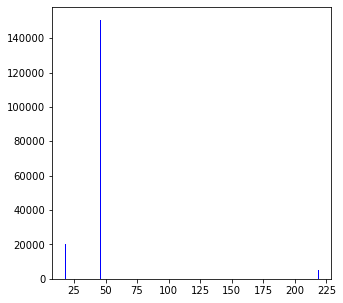

In [11]:
img_redA1 = resA1[:, :, 0]
img_greenA1 = resA1[:, :, 1]
img_blueA1 = resA1[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redA1.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenA1.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueA1.ravel(), bins=256, color="b")
plt.show()

También hicimos el proceso con 3 clusters, inicializando los centroides aleatoriamente y utilizando el umbral 15. Sin embargo, el resultado fue drásticamente menor. Esto se debe a que los centroides no tomarían en cuenta el tono blanco de las franjas, sino posiblemente otro valor, que al promediarse quedaría más cercano al del fondo.

In [12]:
resA2 = seg.kmeans(3, img1, 25, 15, True, [])

Coordenadas aleatorias  242 23
Pixel  [26 42 42]
Coordenadas aleatorias  93 463
Pixel  [57 54 21]
Coordenadas aleatorias  228 71
Pixel  [22 32 33]
C  [(26, 42, 42), (57, 54, 21), (22, 32, 33)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5


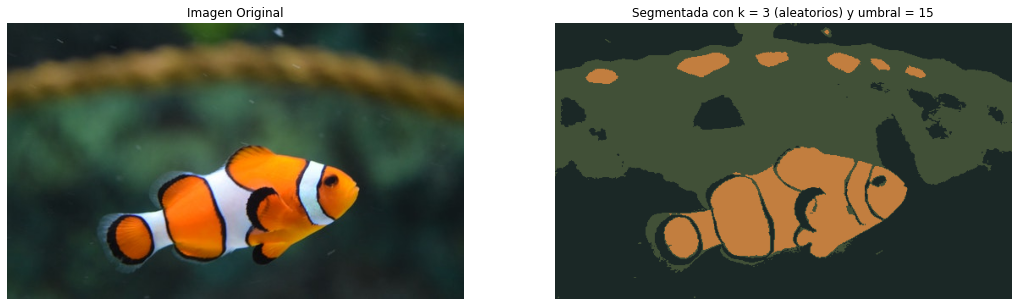

In [13]:
vis.visualize_subplot([img1, resA2],
                      ["Imagen Original", "Segmentada con k = 3 (aleatorios) y umbral = 15"], (1, 2), figsize=(18, 6))

Al igual que con la anterior instanciación de kmeans, en este caso también hicimos la graficación del histograma. En particular, como se puede obsevar se obtuvieron los 3 picos de cada centroide, pero, hay dos que tienen una frecuencia de aparición muy similiar. Esto se debe a que uno de los centroides aleatorios tomó un color del fondo y ocupa gran parte de la imagen en un tono verde, similar al otro cluster que es más oscuro. De esta manera, para este caso, podemos establecer que dado nuestro objetivo de segmentación, fue mucho mejor el resultado inicializando los centroides manualmente y no de manera aleatoria.

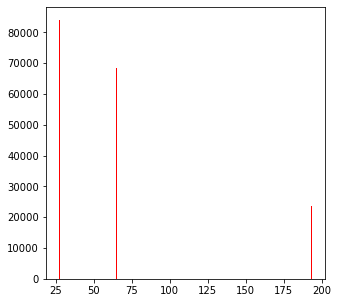

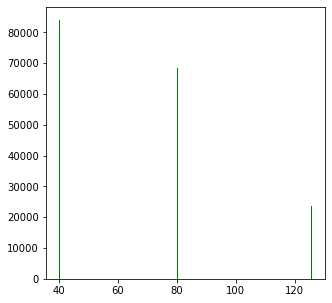

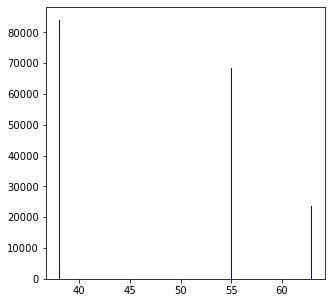

In [14]:
img_redA2 = resA2[:, :, 0]
img_greenA2 = resA2[:, :, 1]
img_blueA2 = resA2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redA2.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenA2.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueA2.ravel(), bins=256, color="b")
plt.show()

### [Aves volando en el atardecer](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg):  <a name="id42"></a>
En este caso, de acuerdo con el objetivo definido de segmentación, se estableció un k=2 y así poder obtener una imagen de dos colores, diferenciando el color del objetivo de segmentación y el del fondo. 

Al igual que con el pez, hicimos dos experimentaciones, para comparar los resultados de inicializar los centroides de manera estratégica y de manera aleatoria.

Para la primera, inicializamos los centroides con los colores de cada grupo que queríamos segmentar, en este caso, el de los pájaros y uno de los rosados del cielo. Para obtener los colores, de nuevo usamos una herramienta de edición de imágenes, escogimos un color de cada región que queríamos resaltar. Por otro lado, el criterio para mover los clusters fue asignar cada pixel al grupo de su color más cercano, usando la función explicada en detalle en la sección Método. De este modo, se agruparon todos los píxeles en los grupos de cada color de nuestro interés. Finalmente, para el criterio de convergencia, usamos un máximo de 25 iteraciones y un umbral de 30, de modo que al comparar las dos últimas iteraciones si los centroides se mueven por debajo de la distancia umbral seleccionada, se establece que hay convergencia y se detiene el algoritmo, pues de esta manera sabemos que los centroides de dichas iteraciones son “virtualmente iguales”.

En particular, el umbral se determinó de manera experimental, hicimos 4 pruebas con diferentes umbrales y la misma inicialización de los centroides. Como se muestra a continuación:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/ComparacionAves.PNG" alt="drawing" width="600" height="500"/>

De lo anterior, notamos que al seleccionar k = 2, se eliminó la región correspondiente al sol, dado que al hacer el promedio, este se tomó como parte del fondo. Por otro lado, observamos que al variar los umbrales se obtuvo prácticamente el mismo resultado, o por lo menos, no logramos encontrar diferencia cualitativa. Adicionalmente, siempre se hicieron el mismo número de iteraciones (2) en todos los casos. Por lo tanto, decidimos tomar umbral 30, dado que se obtenia el mismo resultado y se cumple más rápido el criterio de convergencia.

In [15]:
url2 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/c.jpg"
img2 = seg.download_image(url2)

The shape of the image is: (263, 400, 3)


In [16]:
resB1 = seg.kmeans(2, img2, 25, 30, False, [(7, 0, 22), (253, 172, 148)])

C  [(7, 0, 22), (253, 172, 148)]
Iteracion actual -> 1
Iteracion actual -> 2


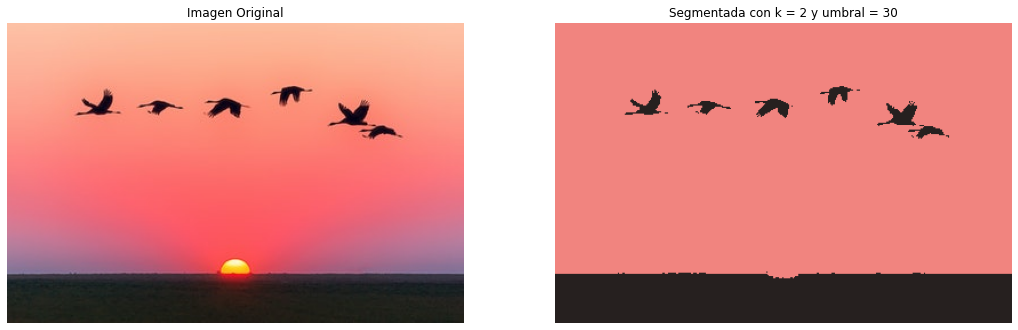

In [17]:
vis.visualize_subplot([img2, resB1],
                      ["Imagen Original", "Segmentada con k = 2 y umbral = 30"], (1, 2), figsize=(18, 6))

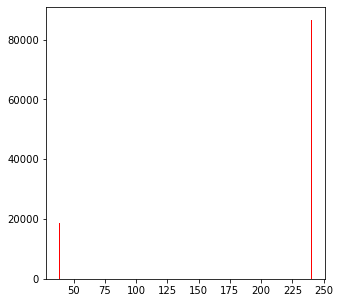

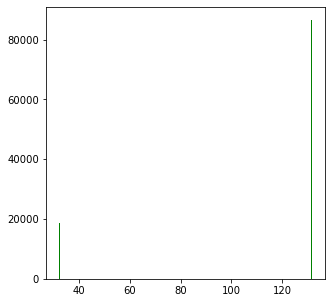

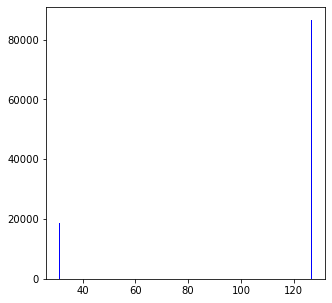

In [18]:
img_redB1 = resB1[:, :, 0]
img_greenB1 = resB1[:, :, 1]
img_blueB1 = resB1[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redB1.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenB1.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueB1.ravel(), bins=256, color="b")
plt.show()

In [19]:
resB2 = seg.kmeans(2, img2, 25, 30, True, [])

Coordenadas aleatorias  114 393
Pixel  [253 131 128]
Coordenadas aleatorias  149 379
Pixel  [240 113 130]
C  [(253, 131, 128), (240, 113, 130)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4


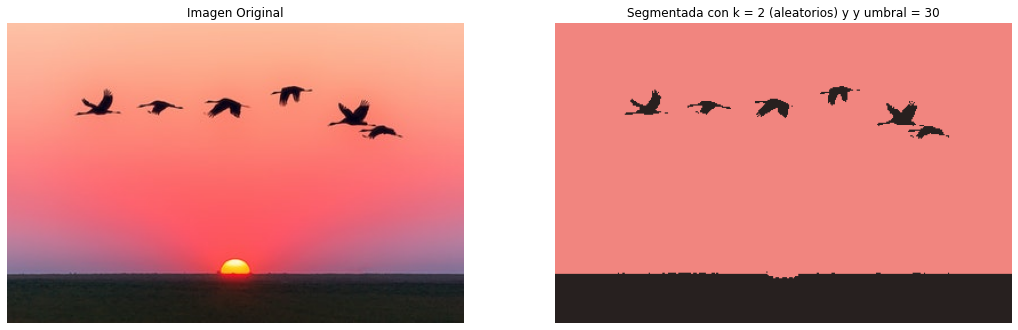

In [20]:
vis.visualize_subplot([img2, resB2],
                      ["Imagen Original", "Segmentada con k = 2 (aleatorios) y y umbral = 30"], (1, 2), figsize=(18, 6))

De nuevo, hicimos el proceso inicializando los dos centroides de manera aleatoria y en este caso, obtuvimos el mismo resultado que con la inicialización manual. Esto se debe a que la imagen original contaba con unos colores dominantes y el correspondiente al sol, tenía una frecuencia de aparición baja, con respecto al del cielo, las aves y el "piso". Por lo cual, al hacer la selección aleatoria se debió tomar un pixel con el color del cielo y otro con el de las aves/piso. 

En particular, lo anterior se puede observar en los histogramas de cada imagen resultado, cuyos valores son iguales.

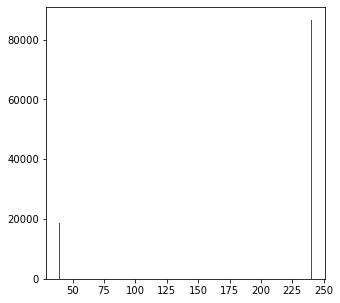

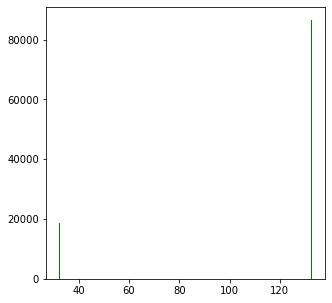

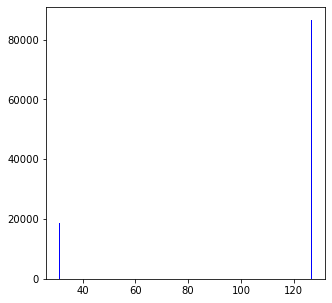

In [21]:
img_redB2 = resB2[:, :, 0]
img_greenB2 = resB2[:, :, 1]
img_blueB2 = resB2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redB2.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenB2.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueB2.ravel(), bins=256, color="b")
plt.show()

### [Conejo](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg): <a name="id43"></a>

En este caso, seleccionamos como objetivo de segmentación el conejo. En particular, las características de esta imagen son interesantes debido a que tiene unos colores principales, como son el amarillo del fondo, el blanco del conejo y algunas partes grises. Sin embargo, en varias regiones, los colores se mezclan como una rampa, en especial, entre la pata izquierda del conejo y el fondo. Adicionalmente, el conejo tiene unas gafas cuyo lente es de un color similar al fondo y con marco transparente. 

Con lo anterior en mente, y siguiendo el método que veníamos manejando, lo ideal sería seleccionar un k=3 con los colores descritos. Sin embargo decidimos en este caso probar tanto con k=2, como con k=3, dado que el tercer color descrito anteriormente cuenta con una pequeña frecuencia de aparición respecto a los otros dos. Adicionalmente, por cada k establecido, se cambió el valor del umbral para probar de manera experimental cuál era el valor ideal para obtener el mejor resultado. 

En el caso de k = 2, variando el umbral con los valores 1, 5, 15, 30, obtuvimos los siguientes resultados:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/comparacionConejo1.PNG" alt="drawing" width="400" height="250"/>

Como se puede observar, los resultados fueron muy similares, casi iguales, pero en el caso de umbral 1 y 5 las imágenes se ven un poco más claras, mientras en 15 y 30 se ven más oscuras. De esta manera, decidimos seleccionar el umbral 5, pues daba una imagen clara y en menos iteraciones que 1. 

In [3]:
url3 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/b.jpg"
img3 = seg.download_image(url3)

The shape of the image is: (552, 529, 3)


In [4]:
resC1 = seg.kmeans(2, img3, 25, 5, False, [(230, 221, 190), (249, 227, 115)])

C  [(230, 221, 190), (249, 227, 115)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3


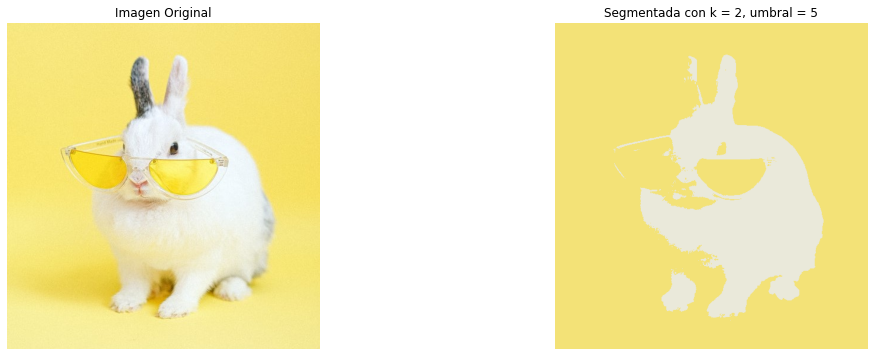

In [5]:
vis.visualize_subplot([img3, resC1],
                      ["Imagen Original", "Segmentada con k = 2, umbral = 5"], (1, 2), figsize=(18, 6))


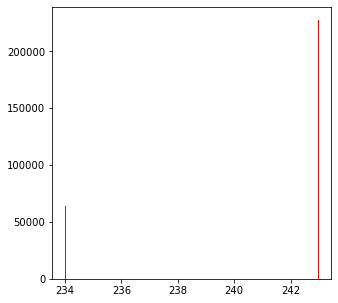

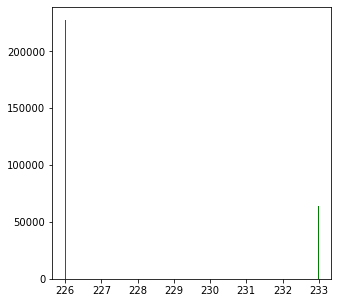

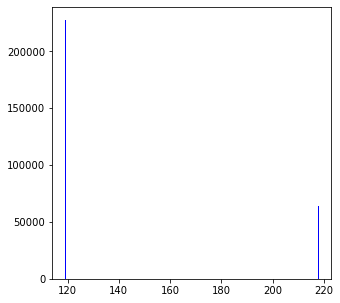

In [6]:
img_redC1 = resC1[:, :, 0]
img_greenC1 = resC1[:, :, 1]
img_blueC1 = resC1[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redC1.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenC1.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueC1.ravel(), bins=256, color="b")
plt.show()

Por otro lado, en el caso de k = 3, hicimos la misma variación obtuvimos las imágenes que se muestran a continuación:

<img src="https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/comparacionConejo2.PNG" alt="drawing" width="450" height="250"/>

En este caso, con k = 3, observamos que todas las imágenes son iguales, no observamos diferencias notorias. Por lo cual, nos decidimos por el umbral 30, que da el mismo resultado en el menor número de iteraciones.

In [8]:
resC2 = seg.kmeans(3, img3, 25, 30, False, [(230, 221, 190), (249, 227, 115), (132, 140, 147)])

C  [(230, 221, 190), (249, 227, 115), (132, 140, 147)]
Iteracion actual -> 1
Iteracion actual -> 2


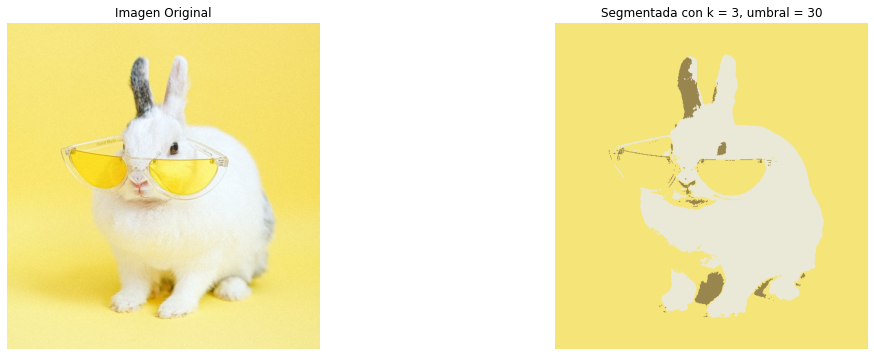

In [9]:
vis.visualize_subplot([img3, resC2],
                      ["Imagen Original", "Segmentada con k = 3, umbral = 30"], (1, 2), figsize=(18, 6))

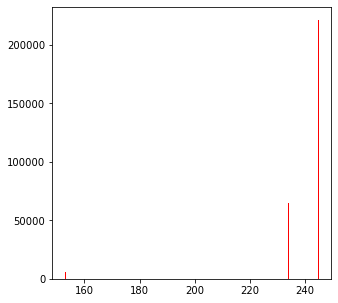

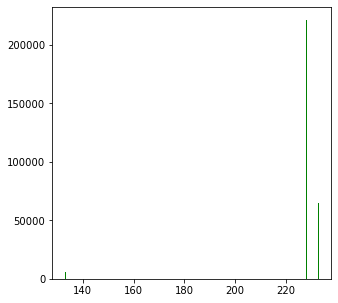

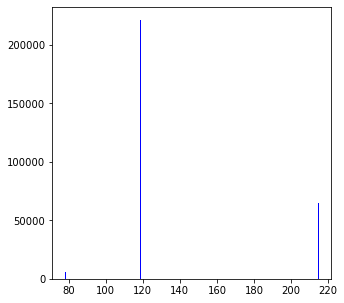

In [10]:
img_redC2 = resC2[:, :, 0]
img_greenC2 = resC2[:, :, 1]
img_blueC2 = resC2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redC2.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenC2.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueC2.ravel(), bins=256, color="b")
plt.show()

En este caso, notamos que la segmentación no fue tan buena como con las imágenes anteriores (pez, aves). En primer lugar, con k=2, se perdía información de una parte de la oreja, la pata izquierda e incluso de la cara, pues esta quedó en el cluster de color amarillo. Adicionalmente, sólo se resaltó en color blanco el pelaje. En particular, esto se debe a que al usar dos clusters, se agruparon los pixeles en el color amarillo del fondo y el blanco del pelaje, pues inicializamos los centroides con dichos valores y al ser los que presentaban mayor frecuencia en la imagen original, se resaltaron como grupos en la imagen resultado, perdiendo la información del color gris oscuro.

Por otro lado, con k=3, observamos que ya hay apariciones de la tonalidad de gris que se perdía en k=2, permitiendo resaltar los detalles de la oreja, el ojo, la nariz y la boca, e incluso un poco del contorno de los lendes de las gafas. En particular, esto se debe a que inicializamos los dos primeros centroides con los mismos valores que en k=2, pero el tercero con el color gris de la oreja. Así pues, los grupos resultantes fueron amarillo, blanco y gris oscuro. Sin embargo, aún observamos que se perdió un poco de información de la cara, la pata izquierda y el marco de los lentes. Esto último lo relacionamos con que en esas secciones hay una intersección de los colores de cada región con un tono de amarillo. Por ejemplo los lentes y una rampa desde la pata al fondo, razón por la cual al hacer el agrupamiento, estos pixeles quedan en el cluster amarillo.

Adicionalmente, al visualizar los histgramas, podemos notar que un color representa el pico más alto, y otro más pequeño. Esto nos reitera que el fondo se separó correctamente y corresponde a dicho pico. Sin embargo, era de esperarse, dado que la imagen original tiene un fondo prácticamente homogeneo.

### [Elefantes](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg): <a name="id44"></a>

Para esta imagen, escogimos como objetivo de segmentación las figuras de los elefantes. Para ello, queríamos segmentar inicializando los centroides con los colores del elefante, el piso café, el pasto y el fondo verde oscuro. De esta manera, establecimos nuestro k=4 e inicializamos los centroides sacando cada color con una herramienta de edición de imágenes. Adicionalmente, al igual que con las imágenes anteriores, experimentamos variando el umbral y, también comparamos el resultado con otra instanciación con k=4 y centroides inicializados aleatoriamente. 

Para empezar, a continuación se muestran las imágenes resultado para k=4 y la variación de los umbrales

![ ](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/ComparacionElefantes.PNG)

En particular, como se puede observar los resultados son prácticamente los mismos, con diferencias no perceptibles. Por lo cual, decidimos quedarnos con el umbral 30 que tiene menos iteraciones, dado que se cumple más rápidamente el criterio de convergencia. 

Con lo anterior en mente, hicimos kmeans con centroides inicializados aleatoriamente, k = 4 y umbral= 30

In [67]:
url4 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/a.jpg"
img4 = seg.download_image(url4)

The shape of the image is: (320, 500, 3)


In [70]:
resD1 = seg.kmeans(4, img4, 25, 30, True, [])

Coordenadas aleatorias  282 79
Pixel  [185 186 146]
Coordenadas aleatorias  56 192
Pixel  [108 113 119]
Coordenadas aleatorias  67 232
Pixel  [135 132 139]
Coordenadas aleatorias  37 187
Pixel  [ 98 107 112]
C  [(185, 186, 146), (108, 113, 119), (135, 132, 139), (98, 107, 112)]
Iteracion actual -> 1
Iteracion actual -> 2


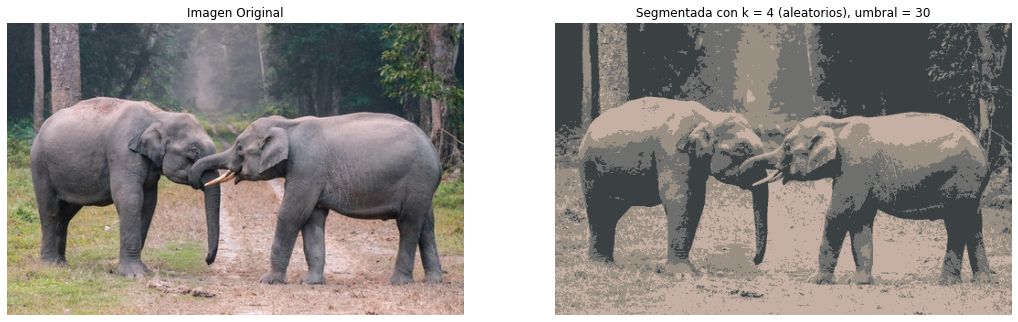

In [77]:
vis.visualize_subplot([img4, resD1],
                      ["Imagen Original", "Segmentada con k = 4 (aleatorios), umbral = 30"], (1, 2), figsize=(18, 6))

Como se observa en la imagen resultado, la segmentación no es del todo buena, puesto que se aprecian muchos contornos falsos y no se logró separar del todo el objetivo de segmentación

In [72]:
resD2 = seg.kmeans(4, img4, 25, 30, False, [(154, 165, 104), (168, 164, 173), (149, 112, 98), (45, 55, 64)])

C  [(154, 165, 104), (168, 164, 173), (149, 112, 98), (45, 55, 64)]
Iteracion actual -> 1
Iteracion actual -> 2


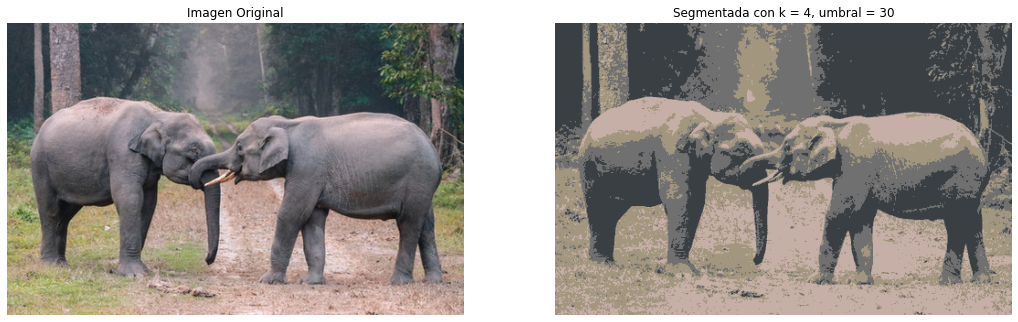

In [78]:
vis.visualize_subplot([img4, resD2],
                      ["Imagen Original", "Segmentada con k = 4, umbral = 30"], (1, 2), figsize=(18, 6))

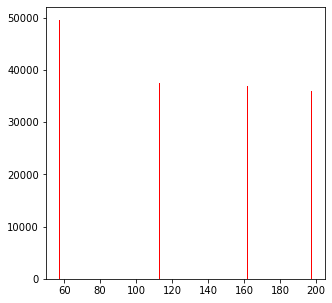

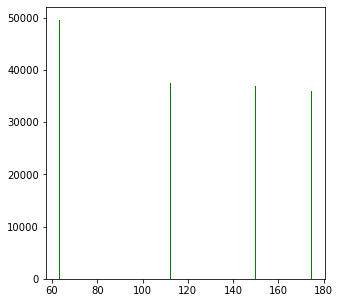

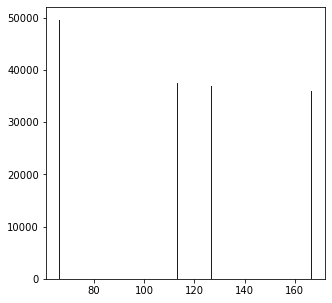

In [80]:
img_redD = resD2[:, :, 0]
img_greenD = resD2[:, :, 1]
img_blueD = resD2[:, :, 2]

plt.figure(figsize=(5, 5))
plt.hist(img_redD.ravel(), bins=256, color="r")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_greenD.ravel(), bins=256, color="g")
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(img_blueD.ravel(), bins=256, color="b")
plt.show()

En el caso de la inicialización estratégica de los centroides, obtuvimos unn resultado muy similar al aleatorio, con diferencias mínimas. De nuevo, la segmentación no es del todo buena y no logramos separar el objetivo de la imágen.

En particular, los resultados obtenidos, tanto en la inicialización aleatoria, como en la estratégica, se deben a que esta imagen cuenta con diferentes detalles y elementos. Adicionalmente, hay elementos que tienen un color muy similar al objetivo de segmentación. Por ejemplo, los elefantes y los árboles de la esquina superior izquierda. Además del color de la tierra del piso y el lomo de los elefantes. Dichos elementos y características, produjeron que al usar los 4 clusters no se lograra diferenciar el objetivo e incluso se vieran del mismo tono, pero con algunos contornos falsos.

Adicionalmente, al ver los histogramas de la imagen resultante, podemos notar que los picos son casi igual de altos, y con una frecuencia de aparición poco diferenciable. Lo cual explica el resultado cuantitativo, en el cual no hay un pico que indique el fondo y otro(s) el objetivo de segmentación, como pasó con los anteriores resultados, como pez y aves.

### [Auroras boreales](https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/1.jpg): <a name="id45"></a>

Dado que, en los anteriores ejercicios queríamos detallar objetos específicos en la imagen, escogiendo diferentes animales como objetivos de segmentación. Para lo cual, buscábamos separar fondos de dichos objetivos. En dichos ejercicios, probamos el funcionamiento al variar el umbral y variamos muy poco el k, dado que ya teníamos claro cuántos grupos haríamos y cómo inicializariamos los centroides. 
En este caso, quisimos probar un ejercicio diferente, al intentar segmentar los colores del cielo y en especial la zona iluminada por la aurora boreal. Para ello, queremos probar la inicialización aleatoria de centroides variando el k (número de clusters) y observando los resultados. 

In [43]:
url5 = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/1.jpg"
img5 = seg.download_image(url5)

The shape of the image is: (293, 450, 3)


In [106]:
resE1 = seg.kmeans(16, img5, 25, 5, True, [])

Coordenadas aleatorias  250 402
Pixel  [147 151 176]
Coordenadas aleatorias  228 110
Pixel  [209 156 186]
Coordenadas aleatorias  122 343
Pixel  [ 30  44 105]
Coordenadas aleatorias  248 38
Pixel  [26 33 17]
Coordenadas aleatorias  180 239
Pixel  [ 94 112 160]
Coordenadas aleatorias  267 372
Pixel  [166 164 204]
Coordenadas aleatorias  289 321
Pixel  [167 168 198]
Coordenadas aleatorias  165 309
Pixel  [ 54  68 139]
Coordenadas aleatorias  12 357
Pixel  [160 234 211]
Coordenadas aleatorias  50 123
Pixel  [ 69 111  99]
Coordenadas aleatorias  286 446
Pixel  [184 164 215]
Coordenadas aleatorias  3 88
Pixel  [29 38 53]
Coordenadas aleatorias  231 272
Pixel  [116 135 177]
Coordenadas aleatorias  289 295
Pixel  [169 172 205]
Coordenadas aleatorias  215 208
Pixel  [101 111 180]
Coordenadas aleatorias  218 66
Pixel  [88 41 51]
C  [(147, 151, 176), (209, 156, 186), (30, 44, 105), (26, 33, 17), (94, 112, 160), (166, 164, 204), (167, 168, 198), (54, 68, 139), (160, 234, 211), (69, 111, 99), (184

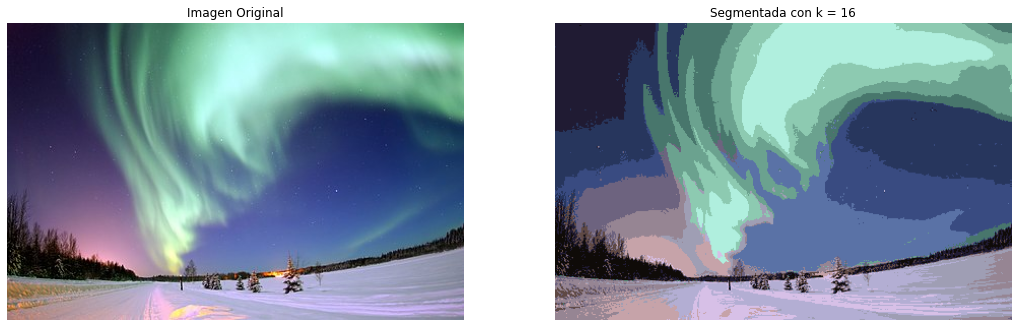

In [107]:
vis.visualize_subplot([img5, resE1],
                      ["Imagen Original", "Segmentada con k = 16"], (1, 2), figsize=(18, 6))


Al utilizar un k = 16, obtuvimos los contornos de las rampas (degradados) producidas por la iluminación del cielo debida a la aurora boreal. En particular, se pueden ver claramente las transiciones de los colores de dichas rampas. Por otro lado, el piso y los árboles se ven claramente diferenciados, dado que sus colores tienen una frecuencia de aparición alta (morado claro del suelo y negro de la montaña y los árboles)


In [96]:
resE2 = seg.kmeans(8, img5, 25, 5, True, [])

Coordenadas aleatorias  195 270
Pixel  [ 81  95 168]
Coordenadas aleatorias  113 270
Pixel  [ 81 108 135]
Coordenadas aleatorias  238 310
Pixel  [138 154 169]
Coordenadas aleatorias  165 273
Pixel  [ 71  82 146]
Coordenadas aleatorias  81 245
Pixel  [150 208 194]
Coordenadas aleatorias  188 133
Pixel  [156 176 165]
Coordenadas aleatorias  74 293
Pixel  [ 97 140 133]
Coordenadas aleatorias  115 180
Pixel  [103 153 142]
C  [(81, 95, 168), (81, 108, 135), (138, 154, 169), (71, 82, 146), (150, 208, 194), (156, 176, 165), (97, 140, 133), (103, 153, 142)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6


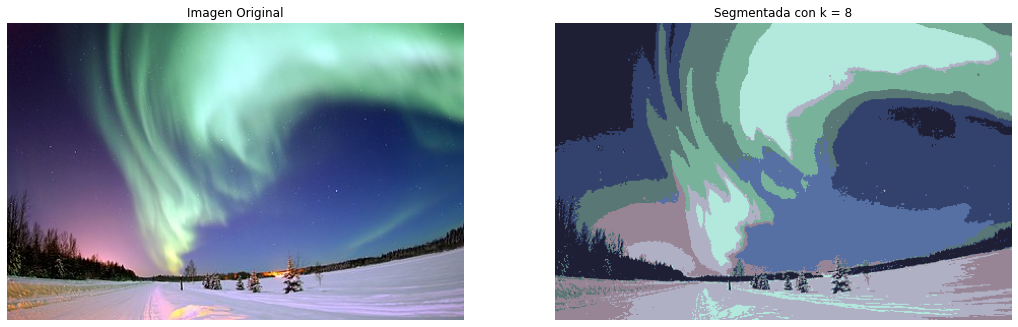

In [102]:
vis.visualize_subplot([img5, resE2],
                      ["Imagen Original", "Segmentada con k = 8"], (1, 2), figsize=(18, 6))

Con k=8, obtuvimos un resultado similar al anterior, sin embargo la cantidad de colores de la rampa de rosado a azul oscuro es menor y menos similar a los tonos originales. Por otro lado, hay áreas que se segmentaron con un color no esperado, como la transición de rosado a azul, que se pintó del mismo tono de verde que el del segmento de la aurora.

In [98]:
resE3 = seg.kmeans(4, img5, 25, 5, True, [])

Coordenadas aleatorias  44 77
Pixel  [42 58 74]
Coordenadas aleatorias  71 437
Pixel  [111 179 140]
Coordenadas aleatorias  193 166
Pixel  [217 255 232]
Coordenadas aleatorias  162 40
Pixel  [ 87  75 115]
C  [(42, 58, 74), (111, 179, 140), (217, 255, 232), (87, 75, 115)]
Iteracion actual -> 1
Iteracion actual -> 2


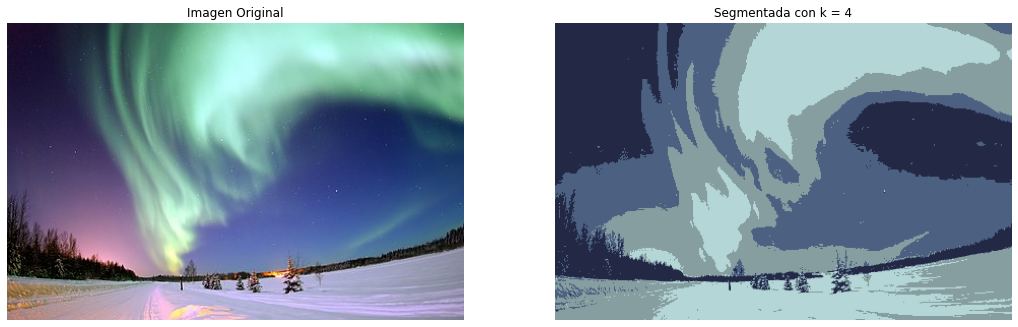

In [103]:
vis.visualize_subplot([img5, resE3],
                      ["Imagen Original", "Segmentada con k = 4"], (1, 2), figsize=(18, 6))

Con k=4, se empiezan a ver menos transiciones en las ramas. Sin embargo, se ve claramente la zona iluminada del cielo, segmentada en el color azul claro, y los verdes claro y grisáceo. Por otro lado, el piso se empezó a segmentar del mismo tono del área correspondiente a la auora boreal. Lo cual es de esperarse, puesto que se redujeron bastante los clusters.

In [104]:
resE4 = seg.kmeans(2, img5, 25, 5, True, [])

Coordenadas aleatorias  113 142
Pixel  [116 169 143]
Coordenadas aleatorias  84 71
Pixel  [41 39 76]
C  [(116, 169, 143), (41, 39, 76)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3


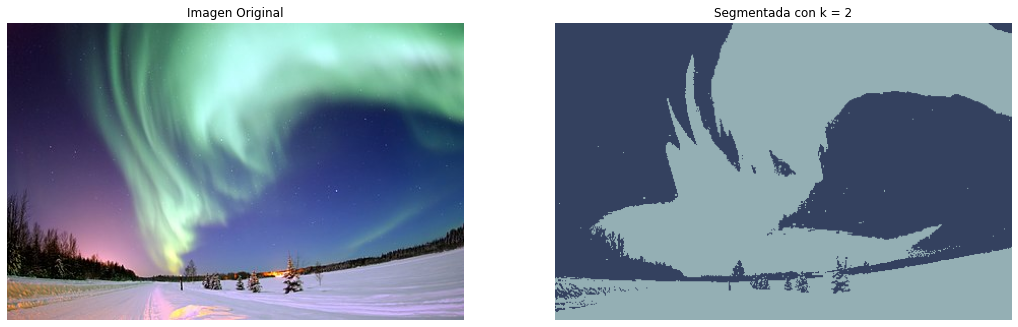

In [105]:
vis.visualize_subplot([img5, resE4],
                      ["Imagen Original", "Segmentada con k = 2"], (1, 2), figsize=(18, 6))

Para finalizar, con k = 2, podemos observar que se segmenta la aurora boreal, con un poco de información del cielo iluminado en la imagen original, ´por tonos rosados y azules claros. Sin embargo, el piso, se segmentó del mismo tono que el área correspondiente al cielo iluminado. 

## **5. Conclusión y discusión**<a name="id5"></a>